# 第十二讲：图和网络

## 图和网络

![title](./resource/graph_12.png)

该图由4个节点与5条边组成，

$$
\begin{array}{c | c c c c}
       & node_1 & node_2 & node_3 & node_4 \\
\hline
edge_1 & -1     & 1      & 0      & 0      \\
edge_2 & 0      & -1     & 1      & 0      \\
edge_3 & -1     & 0      & 1      & 0      \\
edge_4 & -1     & 0      & 0      & 1      \\
edge_5 & 0      & 0      & -1     & 1      \\
\end{array}
$$

我们可以建立$5 \times 4$矩阵
$
A=
\begin{bmatrix}
-1 & 1 & 0 & 0 \\
0 & -1 & 1 & 0 \\
-1 & 0 & 1 & 0 \\
-1 & 0 & 0 & 1 \\
0 & 0 & -1 & 1 \\
\end{bmatrix}
$

观察前三行，易看出这三个行向量线性相关，也就是这三个向量可以形成回路（loop）。

现在，解$Ax=0$：
$
Ax=
\begin{bmatrix}
-1 & 1 & 0 & 0 \\
0 & -1 & 1 & 0 \\
-1 & 0 & 1 & 0 \\
-1 & 0 & 0 & 1 \\
0 & 0 & -1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\\x_3\\x_4\\
\end{bmatrix}
$。

展开得到：
$
\begin{bmatrix}
x_2-x_1 \\
x_3-x_2 \\
x_3-x_1 \\
x_4-x_1 \\
x_4-x_3 \\
\end{bmatrix}
=
\begin{bmatrix}
0\\0\\0\\0\\0\\
\end{bmatrix}
$

引入矩阵的实际意义：将$x=\begin{bmatrix}x_1 & x_2 & x_3 & x_4\end{bmatrix}$设为各节点电势（Potential at the Nodes）。

则式子中的诸如$x_2-x_1$的元素，可以看做该边上的电势差（Potential Differences）。

容易看出其中一个解$x=\begin{bmatrix}1\\1\\1\\1\end{bmatrix}$，即等电势情况，此时电势差为$0$。

化简$A$易得$rank(A)=3$，所以其零空间维数应为$n-r=4-3=1$，即$\begin{bmatrix}1\\1\\1\\1\end{bmatrix}$就是其零空间的一组基。

其零空间的物理意义为，当电位相等时，不存在电势差，图中无电流。

当我们把图中节点$4$接地后，节点$4$上的电势为$0$，此时的
$
A=
\begin{bmatrix}
-1 & 1 & 0 \\
0 & -1 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 0 \\
0 & 0 & -1 \\
\end{bmatrix}
$，各列线性无关，$rank(A)=3$。

现在看看$A^Ty=0$（这是应用数学里最常用的式子）：

$
A^Ty=0=
\begin{bmatrix}
-1 & 0 & -1 & -1 & 0 \\
1 & -1 & 0 & 0 & 0 \\
0 & 1 & 1 & 0 & -1 \\
0 & 0 & 0 & 1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
y_1\\y_2\\y_3\\y_4\\y_5
\end{bmatrix}
=
\begin{bmatrix}
0\\0\\0\\0
\end{bmatrix}
$，对于转置矩阵有$dim N(A^T)=m-r=5-3=2$。

接着说上文提到的的电势差，矩阵$C$将电势差与电流联系起来，电流与电势差的关系服从欧姆定律：边上的电流值是电势差的倍数，这个倍数就是边的电导（conductance）即电阻（resistance）的倒数。

$
电势差
\xrightarrow[欧姆定律]{矩阵C}
各边上的电流y_1, y_2, y_3, y_4, y_5
$，而$A^Ty=0$的另一个名字叫做“基尔霍夫电流定律”（Kirchoff's Law, 简称KCL）。

再把图拿下来观察：

![title](./resource/graph_12.png)

将$A^Ty=0$中的方程列出来：
$
\left\{
\begin{aligned}
y_1 + y_3 + y_4 &= 0 \\
y_1 - y_2 &= 0 \\
y_2 + y_3 - y_5 &= 0 \\
y_4 - y_5 &= 0 \\
\end{aligned}
\right.
$

对比看$A^Ty=0$的第一个方程，$-y_1-y_3-y_4=0$，可以看出这个方程是关于节点$1$上的电流的，方程指出节点$1$上的电流和为零，基尔霍夫定律是一个平衡方程、守恒定律，它说明了流入等于流出，电荷不会在节点上累积。

对于$A^T$，有上文得出其零空间的维数是$2$，则零空间的基应该有两个向量。

* 现在假设$y_1=1$，也就是令$1$安培的电流在边$1$上流动；
* 由图看出$y_2$也应该为$1$；
* 再令$y_3=-1$，也就是让$1$安培的电流流回节点$1$；
* 令$y_4=y_5=0$；

得到一个符合KCL的向量$\begin{bmatrix}1\\1\\-1\\0\\0\end{bmatrix}$，代回方程组发现此向量即为一个解，这个解发生在节点$1,2,3$组成的回路中，该解即为零空间的一个基。

根据上一个基的经验，可以利用$1,3,4$组成的节点求另一个基：

* 令$y_1=y_2=0$；
* 令$y_3=1$；
* 由图得$y_5=1$；
* 令$y_4=-1$；

得到令一个符合KCL的向量$\begin{bmatrix}0\\0\\1\\-1\\1\end{bmatrix}$，代回方程可知此为另一个解。

则$N(A^T)$的一组基为$\begin{bmatrix}1\\1\\-1\\0\\0\end{bmatrix}\quad\begin{bmatrix}0\\0\\1\\-1\\1\end{bmatrix}$。

看图，利用节点$1,2,3,4$组成的大回路（即边$1,2,5,4$）：

* 令$y_3=0$；
* 令$y_1=1$；
* 则由图得$y_2=1, y_5=1, y_4=-1$；

得到符合KCL的向量$\begin{bmatrix}1\\1\\0\\-1\\1\end{bmatrix}$，易看出此向量为求得的两个基之和。

接下来观察$A$的行空间，即$A^T$的列空间，方便起见我们直接计算
$
A^T=
\begin{bmatrix}
-1 & 0 & -1 & -1 & 0 \\
1 & -1 & 0 & 0 & 0 \\
0 & 1 & 1 & 0 & -1 \\
0 & 0 & 0 & 1 & 1 \\
\end{bmatrix}
$
的列空间。

易从基的第一个向量看出前三列$A^T$的线性相关，则$A^T$的主列为第$1,2,4$列，对应在图中就是边$1,2,4$，可以发现这三条边没有组成回路，则在这里可以说**线性无关等价于没有回路**。由$4$个节点与$3$条边组成的图没有回路，就表明$A^T$的对应列向量线性无关，也就是节点数减一（$rank=nodes-1$）条边线性无关。另外，没有回路的图也叫作树（Tree）。

再看左零空间的维数公式：$dim N(A^T)=m-r$，左零空间的维数就是相互无关的回路的数量，于是得到$loops=edges-(nodes-1)$，整理得：

$$
nodes-edges+loops=1
$$

此等式对任何图均有效，任何图都有此拓扑性质，这就是著名的欧拉公式（Euler's Formula）。$零维（节点）-一维（边）+二维（回路）=1$便于记忆。

总结：

* 将电势记为$e$，则在引入电势的第一步中，有$e=Ax$；
* 电势差导致电流产生，$y=Ce$；
* 电流满足基尔霍夫定律方程，$A^Ty=0$；

这些是在无电源情况下的方程。

电源可以通过：在边上加电池（电压源），或在节点上加外部电流 两种方式接入。

如果在边上加电池，会体现在$e=Ax$中；如果在节点上加电流，会体现在$A^Ty=f$中，$f$向量就是外部电流。

将以上三个等式连起来得到$A^TCAx=f$。另外，最后一个方程是一个平衡方程，还需要注意的是，方程仅描述平衡状态，方程并不考虑时间。最后，$A^TA$是一个对称矩阵。

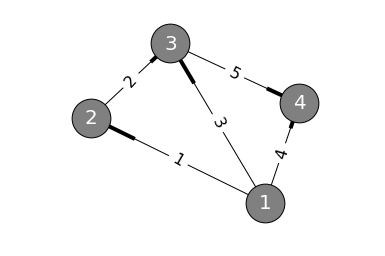

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

dg = nx.DiGraph()
dg.add_edges_from([(1,2), (2,3), (1,3), (1,4), (3,4)])
edge_labels = {(1, 2): 1, (1, 3): 3, (1, 4): 4, (2, 3): 2, (3, 4): 5}

pos = nx.spring_layout(dg)
nx.draw_networkx_edge_labels(dg,pos,edge_labels=edge_labels, font_size=16)
nx.draw_networkx_labels(dg, pos, font_size=20, font_color='w')
nx.draw(dg, pos, node_size=1500, node_color="gray")